<a href="https://colab.research.google.com/github/satoshi-yamakawa/exp4_3/blob/task_1-5/exp4_kadai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

実施内容1(変調回路)

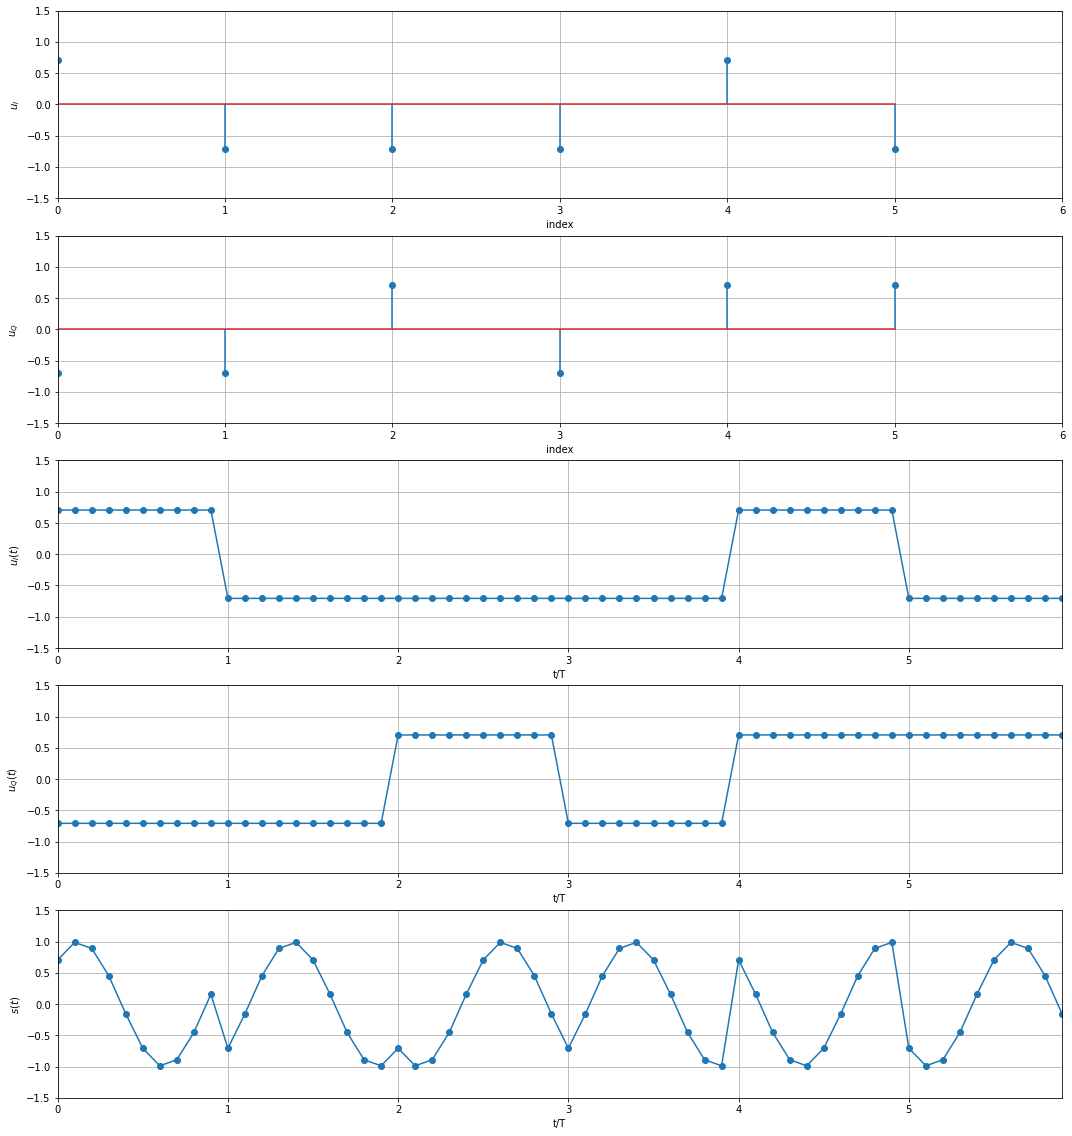

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt


m = np.array([1,0,1,1,0,1,1,1,0,0,0,1])      # ビット系列
M = round(m.shape[0]/2)          # シンボル数（QPSK：2ビット/シンボル)

fc = 100;                 # 搬送波周波数 [Hz] 
R  = 100;                 # シンボルレート [symbols/sec]
T  = 1/R;                 # シンボル周期
Fs = R*10;                # サンプリング周波数（シンボル周期の10倍）
Ts = 1/Fs;                # サンプル周期

N  = round(T/Ts);         # シンボル当たりのサンプル数
mm = np.arange(M);
n  = np.arange(M*N);      
t  = n*Ts;                # 時間  
pi = math.pi;

car = np.exp(np.array(1j*2*pi*fc*t));  # 搬送波（1周期/シンボル）
g_t = np.ones(N);          # パルス整形フィルタ

# Modulation
uI = np.zeros(M);
uQ = np.zeros(M);
uI_t = [];
uQ_t = [];
for ii in range(M):
  if m[round(2*ii)] == 0:
    if m[round(2*ii+1)] == 0:
      ph = math.pi/4       # '00'
    else:
      ph = 3*math.pi/4       # '01'
  else:
    if m[round(2*ii+1)] == 1:
      ph = 5*math.pi/4       # '11'
    else:
      ph = 7*math.pi/4       # '10'           

  # 符号系列
  uI[ii] = math.cos(ph);
  uQ[ii] = math.sin(ph);
      
  # 基底帯域信号
  uI_t = np.hstack((uI_t, g_t*uI[ii]));
  uQ_t = np.hstack((uQ_t, g_t*uQ[ii]));

u   = uI_t+1j*uQ_t;     # 基底帯域信号
s_t = (u*car).real;     # 帯域信号

fig = plt.figure(figsize=(18,20))

ax1 = fig.add_subplot(511)
ax1.stem(mm, uI,use_line_collection=True)
ax1.set_xlabel("index")
ax1.set_ylabel("$u_I$")
ax1.set_xlim(0,M)
ax1.set_ylim(-1.5,1.5)
ax1.grid("both")

ax2 = fig.add_subplot(512)
ax2.stem(mm, uQ,use_line_collection=True)
ax2.set_xlabel("index")
ax2.set_ylabel("$u_Q$")
ax2.set_xlim(0,M)
ax2.set_ylim(-1.5,1.5)
ax2.grid("both")

ax3 = fig.add_subplot(513)
ax3.plot(t/T, uI_t, '-o')
ax3.set_xlabel("t/T")
ax3.set_ylabel("$u_I(t)$")
ax3.set_xlim(0,t[-1]/T)
ax3.set_ylim(-1.5,1.5)
ax3.grid("both")

ax4 = fig.add_subplot(514)
ax4.plot(t/T, uQ_t, '-o')
ax4.set_xlabel("t/T")
ax4.set_ylabel("$u_Q(t)$")
ax4.set_xlim(0,t[-1]/T)
ax4.set_ylim(-1.5,1.5)
ax4.grid("both")

ax5 = fig.add_subplot(515)
ax5.plot(t/T, s_t, '-o')
ax5.set_xlabel("t/T")
ax5.set_ylabel("$s(t)$")
ax5.set_xlim(0,t[-1]/T)
ax5.set_ylim(-1.5,1.5)
ax5.grid("both")

実施内容2（復調回路）

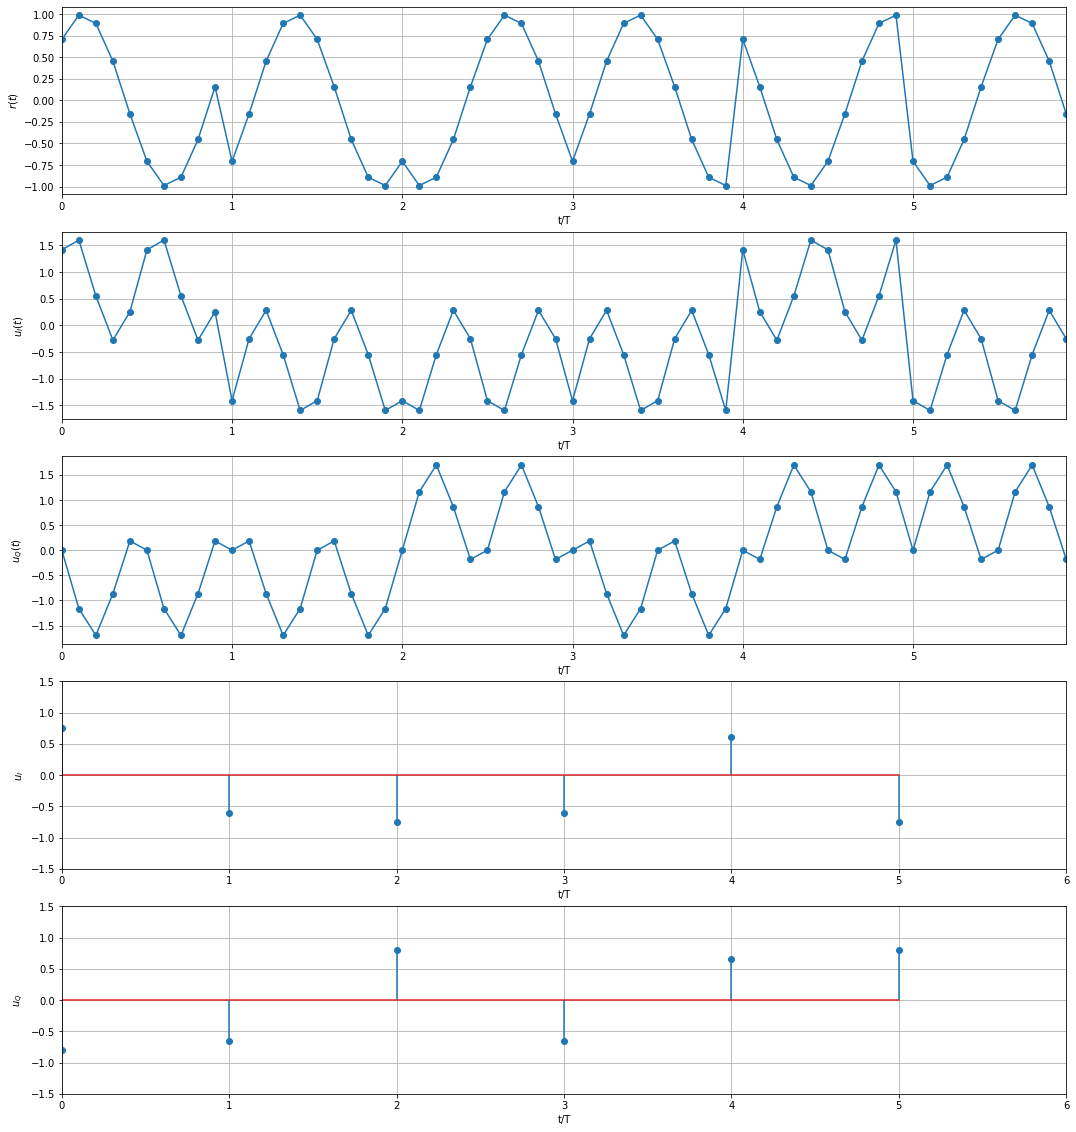

In [ ]:
# De-Modulation

rt = s_t; #雑音無し受信信号
rI = rt*2*car.real;
rQ = -rt*2*car.imag;
r_uI = [];
r_uQ = [];
for ii in range(M):
    r_uI = np.append(r_uI, np.mean(rI[(ii*N):((ii+1)*N-1)]));
    r_uQ = np.append(r_uQ, np.mean(rQ[(ii*N):((ii+1)*N-1)]));

fig = plt.figure(figsize=(18,20))

ax1 = fig.add_subplot(511)
ax1.plot(t/T, rt, '-o')
ax1.set_xlabel("t/T")
ax1.set_ylabel("$r(t)$")
ax1.set_xlim(0,t[-1]/T)
ax1.grid("both")

ax2 = fig.add_subplot(512)
ax2.plot(t/T, rI, '-o')
ax2.set_xlabel("t/T")
ax2.set_ylabel("$u_I(t)$")
ax2.set_xlim(0,t[-1]/T)
ax2.grid("both")

ax3 = fig.add_subplot(513)
ax3.plot(t/T, rQ, '-o')
ax3.set_xlabel("t/T")
ax3.set_ylabel("$u_Q(t)$")
ax3.set_xlim(0,t[-1]/T)
ax3.grid("both")

ax4 = fig.add_subplot(514)
ax4.stem(mm, r_uI,use_line_collection=True)
ax4.set_xlabel("t/T")
ax4.set_ylabel("$u_I$")
ax4.set_xlim(0,M)
ax4.set_ylim(-1.5,1.5)
ax4.grid("both")

ax5 = fig.add_subplot(515)
ax5.stem(mm, r_uQ,use_line_collection=True)
ax5.set_xlabel("t/T")
ax5.set_ylabel("$u_Q$")
ax5.set_xlim(0,M)
ax5.set_ylim(-1.5,1.5)
ax5.grid("both")

実施内容3（BER特性）

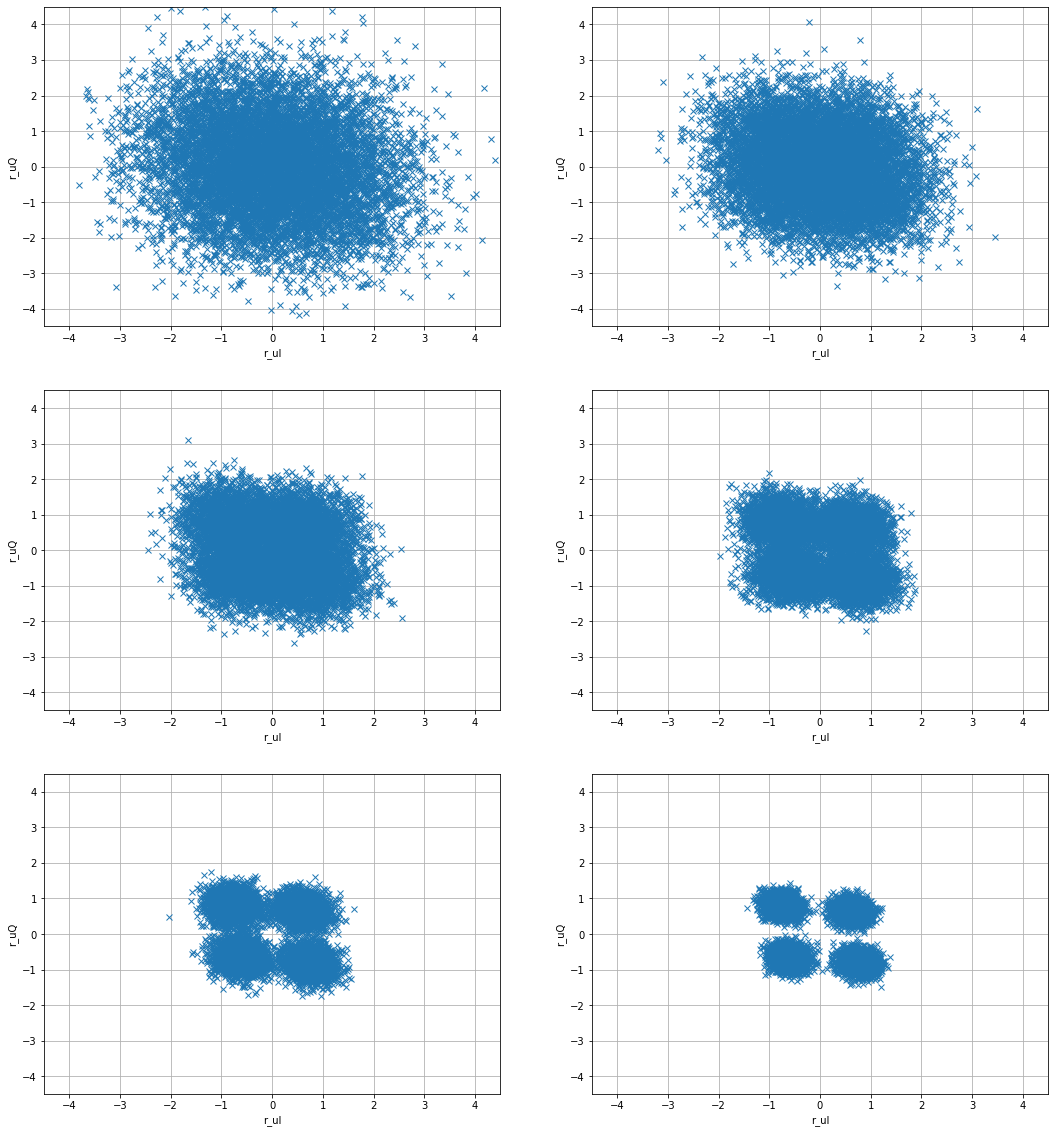

[1.269e-01 8.535e-02 4.580e-02 1.650e-02 2.950e-03 1.000e-04]


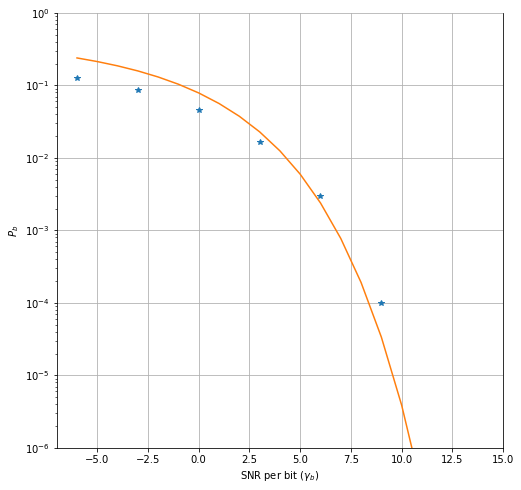

In [ ]:
#送信ビット列を生成(0～1の整数で，bit_num×1の行列を生成)

bit_num = 20000
m = np.random.randint(0, 2, (bit_num))
M = round(m.shape[0]/2)          # シンボル数（QPSK：2ビット/シンボル)

n  = np.arange(M*N);      
t  = n*Ts;                # 時間

car = np.exp(np.array(1j*2*pi*fc*t));  # 搬送波（1周期/シンボル）

###################################################
# Modulation                                      #
###################################################
uI = np.zeros(M);
uQ = np.zeros(M);
uI_t = [];
uQ_t = [];
for ii in range(M):
  if m[round(2*ii)] == 0:
    if m[round(2*ii+1)] == 0:
      ph = math.pi/4       # '00'
    else:
      ph = 3*math.pi/4       # '01'
  else:
    if m[round(2*ii+1)] == 1:
      ph = 5*math.pi/4       # '11'
    else:
      ph = 7*math.pi/4       # '10'           

  # 符号系列
  uI[ii] = math.cos(ph);
  uQ[ii] = math.sin(ph);
      
  # 基底帯域信号
  uI_t = np.hstack((uI_t, g_t*uI[ii]));
  uQ_t = np.hstack((uQ_t, g_t*uQ[ii]));

u   = uI_t+1j*uQ_t;     # 基底帯域信号
s_t = (u*car).real;     # 帯域信号

###################################################
# De-Modulation                                   #
###################################################

rbdB = np.array([-6,-3,0,3,6,9]);
rb = 10**(rbdB/10);
sig2 = 5/4/rb; #熱雑音電力
SNR = 1/2/sig2;
SNRdB = 10*np.log10(SNR);


BER = np.zeros(len(rbdB));
E = np.zeros(len(rbdB));

fig = plt.figure(figsize=(18,20))

for ii in range(len(rbdB)):
  rt = s_t + math.sqrt(sig2[ii])*np.random.randn(M*N);
  #rt = s_t

  rI = rt*2*car.real;
  rQ = -rt*2*car.imag;
  r_uI = [];
  r_uQ = [];
  m_hat = [];
  err = 0;
  
  for iii in range(M):
      r_uI = np.append(r_uI, np.mean(rI[(iii*N):((iii+1)*N-1)]));
      r_uQ = np.append(r_uQ, np.mean(rQ[(iii*N):((iii+1)*N-1)]));

      if r_uI[iii] > 0:
        if r_uQ[iii] > 0:
          m_hat = np.append(m_hat,[0,0]);
        else:
          m_hat = np.append(m_hat,[1,0]);
      else:
        if r_uQ[iii] < 0:
          m_hat = np.append(m_hat,[1,1]);
        else:
          m_hat = np.append(m_hat,[0,1]);

      if m[iii] != m_hat[iii]:
        err += 1;

  E[ii] = err;
  BER[ii] = E[ii]/bit_num;

  if ii == 0:
    ax1 = fig.add_subplot(321)
    ax1.plot(r_uI, r_uQ, 'x')
    ax1.set_xlabel("r_uI")
    ax1.set_ylabel("r_uQ")
    ax1.grid("both")
    ax1.set_xlim(-4.5,4.5)
    ax1.set_ylim(-4.5,4.5)
  if ii == 1:
    ax2 = fig.add_subplot(322)
    ax2.plot(r_uI, r_uQ, 'x')
    ax2.set_xlabel("r_uI")
    ax2.set_ylabel("r_uQ")
    ax2.grid("both")
    ax2.set_xlim(-4.5,4.5)
    ax2.set_ylim(-4.5,4.5)
  if ii == 2:
    ax3 = fig.add_subplot(323)
    ax3.plot(r_uI, r_uQ, 'x')
    ax3.set_xlabel("r_uI")
    ax3.set_ylabel("r_uQ")
    ax3.grid("both")
    ax3.set_xlim(-4.5,4.5)
    ax3.set_ylim(-4.5,4.5)
  if ii == 3:
    ax4 = fig.add_subplot(324)
    ax4.plot(r_uI, r_uQ, 'x')
    ax4.set_xlabel("r_uI")
    ax4.set_ylabel("r_uQ")
    ax4.grid("both")
    ax4.set_xlim(-4.5,4.5)
    ax4.set_ylim(-4.5,4.5)
  if ii == 4:
    ax5 = fig.add_subplot(325)
    ax5.plot(r_uI, r_uQ, 'x')
    ax5.set_xlabel("r_uI")
    ax5.set_ylabel("r_uQ")
    ax5.grid("both")
    ax5.set_xlim(-4.5,4.5)
    ax5.set_ylim(-4.5,4.5)
  if ii == 5:
    ax6 = fig.add_subplot(326)
    ax6.plot(r_uI, r_uQ, 'x')
    ax6.set_xlabel("r_uI")
    ax6.set_ylabel("r_uQ")
    ax6.grid("both")
    ax6.set_xlim(-4.5,4.5)
    ax6.set_ylim(-4.5,4.5)
plt.show()

print(BER)
#print(E)

###################################################
Xaxi_dB = np.array(list(range(-6,15))) + 0.;
Xaxi = np.array(np.zeros(len(Xaxi_dB))) + 0.;
for ii in range(len(Xaxi_dB)):
  Xaxi[ii] = 10**(Xaxi_dB[ii]/10);

Xsn = np.zeros(len(Xaxi));
XsndB = np.zeros(len(Xaxi));                        ##################
Yaxi = np.zeros(len(Xaxi));                         # QPSK BER理論値 #
sqrt = math.sqrt;                                   ##################
exp = math.e;

for ii in range(len(Xaxi)):
  Xsn[ii] = 2/5*Xaxi[ii];
  XsndB[ii] = 10*math.log10(Xsn[ii])
  Yaxi[ii] = 1/2*math.erfc(sqrt(Xaxi[ii]))
###################################################
fig1 = plt.figure(figsize=(8,8))
ax7 = fig1.add_subplot(111)
ax7.plot(rbdB,BER,'*')
ax7.plot(Xaxi_dB,Yaxi)
ax7.set_xlabel("SNR per bit $(\gamma_b)$")
ax7.set_ylabel("$P_b$")
ax7.set_ylim(0.000001,1)
ax7.grid("both")
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.set_yscale('log')  # メイン: y軸をlogスケールで描く
plt.show()

In [ ]:
print(SNRdB)

[-19.95880017 -13.95880017  -7.95880017  -1.95880017   4.04119983
  10.04119983]


実施内容4（チャネル推定）

間違っているシンボルは 0 です


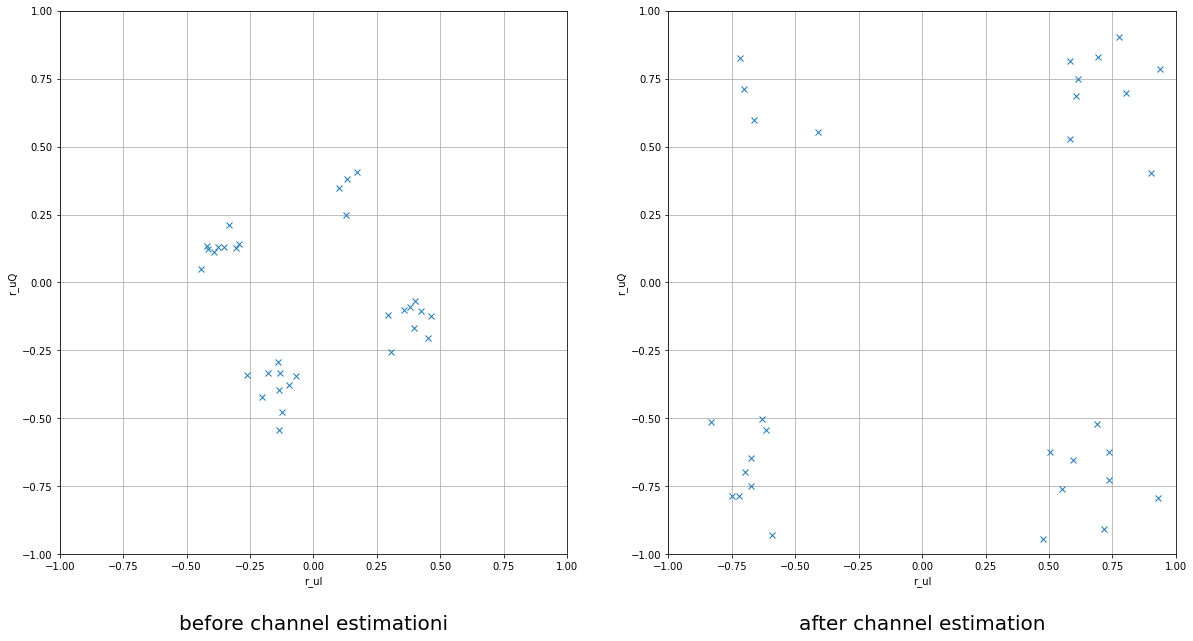

In [ ]:
import xlrd
Npre = 16
Ndata = 32

wb = xlrd.open_workbook('data1.xlsx')

p = wb.sheet_by_name('プリアンブルビット系列')
m_pre = np.array(p.col_values(0))
d = wb.sheet_by_name('データ系列')
m_data = np.array(d.col_values(0))
sheet = wb.sheet_by_name('変調信号')

col1 = np.array(sheet.col_values(0))
col1 = np.delete(col1,0,0)
col1 = np.array([float(s) for s in col1])

col2 = np.array(sheet.col_values(1))
col2 = np.delete(col2,0,0)
col2 = np.array([float(s) for s in col2])

u1 = col1+1j*col2 # 基底帯域信号

u_hat_pre = np.delete(u1,range(Npre,Npre+Ndata),0) # 受信プリアンブル基底帯域信号
u_hat_data = np.delete(u1,range(Npre),0) # 受信データビット基底帯域信号

uI_pre = np.zeros(Npre);
uQ_pre = np.zeros(Npre);

for ii in range(Npre):
  if m_pre[round(2*ii)] == 0:
    if m_pre[round(2*ii+1)] == 0:
      ph = math.pi/4       # '00'
    else:
      ph = 3*math.pi/4       # '01'
  else:
    if m_pre[round(2*ii+1)] == 1:
      ph = 5*math.pi/4       # '11'
    else:
      ph = 7*math.pi/4       # '10'           

  # 符号系列
  uI_pre[ii] = math.cos(ph);
  uQ_pre[ii] = math.sin(ph);

u_pre   = uI_pre+1j*uQ_pre;     # 送信プリアンブル基底帯域信号

SUM = 0
for ii in range(Npre):
  SUM = SUM + u_hat_pre[ii]*u_pre[ii].conjugate()

h_hat = SUM/Npre  # チャネル推定
u_hat_data = u_hat_data/h_hat # 補償

uI_hat = u_hat_data.real
uQ_hat = u_hat_data.imag
m_hat_data = []
err = 0
for ii in range(Ndata):
  if uI_hat[ii] > 0:
    if uQ_hat[ii] > 0:
      m_hat_data = np.append(m_hat_data,[0,0]);
    else:
      m_hat_data = np.append(m_hat_data,[1,0]);
  else:
    if uQ_hat[ii] < 0:
      m_hat_data = np.append(m_hat_data,[1,1]);
    else:
      m_hat_data = np.append(m_hat_data,[0,1]);

  if m_data[ii] != m_hat_data[ii]:  # エラー判定
        err += 1;

print("間違っているシンボルは",err,"です")

fig = plt.figure(figsize=(20,10))

ax8 = fig.add_subplot(121)
ax8.plot(uI_hat_data, uQ_hat_data, 'x')
ax8.set_xlabel("r_uI")
ax8.set_ylabel("r_uQ")
ax8.grid("both")
ax8.set_xlim(-1.0,1.0)
ax8.set_ylim(-1.0,1.0)
plt.title("before channel estimation",y=-0.15,fontsize = 20);

ax9 = fig.add_subplot(122)
ax9.plot(uI_hat, uQ_hat, 'x')
ax9.set_xlabel("r_uI")
ax9.set_ylabel("r_uQ")
ax9.grid("both")
ax9.set_xlim(-1.0,1.0)
ax9.set_ylim(-1.0,1.0)
plt.title("after channel estimation",y=-0.15,fontsize = 20);

実施内容5（信号合成）

間違っているシンボルは 0 です


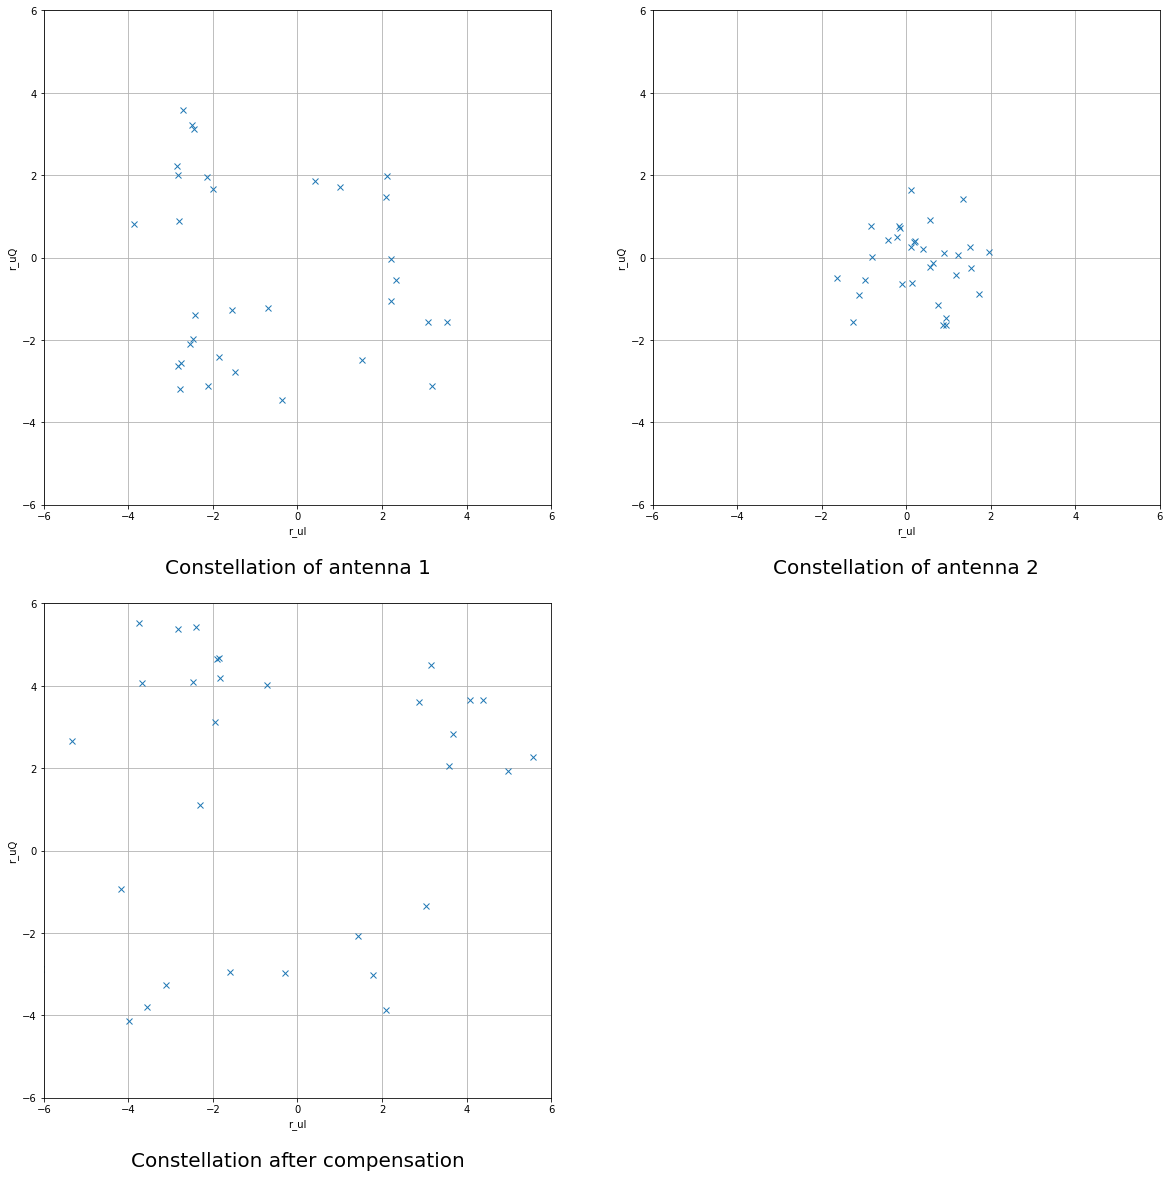

In [ ]:
# テーブル読み取り
import xlrd
wb = xlrd.open_workbook('data2.xlsx')

p = wb.sheet_by_name('プリアンブルビット系列')
pcol1 = np.array(p.col_values(0))
d = wb.sheet_by_name('データ系列')
dcol1 = np.array(d.col_values(0))

uuI_pre = np.zeros(Npre);
uuQ_pre = np.zeros(Npre);

for ii in range(Npre):
  if pcol1[round(2*ii)] == 0:
    if pcol1[round(2*ii+1)] == 0:
      ph = math.pi/4       # '00'
    else:
      ph = 3*math.pi/4       # '01'
  else:
    if pcol1[round(2*ii+1)] == 1:
      ph = 5*math.pi/4       # '11'
    else:
      ph = 7*math.pi/4       # '10'           

  # 符号系列
  uuI_pre[ii] = math.cos(ph);
  uuQ_pre[ii] = math.sin(ph);

uu_pre   = uuI_pre+1j*uuQ_pre;     # 送信プリアンブル基底帯域信号

for ii in range(4):
  if ii == 0:
    sheet = wb.sheet_by_name('変調信号(Ant１，TS１）')
  if ii == 1:
    sheet = wb.sheet_by_name('変調信号(Ant１，TS２）')
  if ii == 2:
    sheet = wb.sheet_by_name('変調信号(Ant２，TS１）')
  if ii == 3:
    sheet = wb.sheet_by_name('変調信号(Ant２，TS２）')

  col1 = np.array(sheet.col_values(0))
  col1 = np.delete(col1,0,0)
  col1 = np.array([float(s) for s in col1])
  col2 = np.array(sheet.col_values(1))
  col2 = np.delete(col2,0,0)
  col2 = np.array([float(s) for s in col2])

  if ii == 0:
    uu1 = col1+1j*col2 # 基底帯域信号
    uu1_pre = np.delete(uu1,range(Npre,Npre+Ndata),0)
    uu1_data = np.delete(uu1,range(Npre),0)
  if ii == 1:
    uu2 = col1+1j*col2 # 基底帯域信号
    uu2_pre = np.delete(uu2,range(Npre,Npre+Ndata),0)
    uu2_data = np.delete(uu2,range(Npre),0)
  if ii == 2:
    uu3 = col1+1j*col2 # 基底帯域信号
    uu3_pre = np.delete(uu3,range(Npre,Npre+Ndata),0)
    uu3_data = np.delete(uu3,range(Npre),0)
  if ii == 3:
    uu4 = col1+1j*col2 # 基底帯域信号
    uu4_pre = np.delete(uu4,range(Npre,Npre+Ndata),0)
    uu4_data = np.delete(uu4,range(Npre),0)

u_ant1_pre = uu1_pre + uu2_pre # アンテナ1のプリアンブル系列合成基底帯域信号
u_ant1_data = uu1_data + uu2_data # アンテナ1のデータ系列合成基底帯域信号

u_ant2_pre = uu3_pre + uu4_pre # アンテナ2のプリアンブル系列合成基底帯域信号
u_ant2_data = uu3_data + uu4_data # アンテナ2のデータ系列合成基底帯域信号

SUM1 = 0
SUM2 = 0
for ii in range(Npre):
  SUM1 = SUM1 + uu1_pre[ii]*uu_pre[ii].conjugate()
  SUM2 = SUM2 + uu3_pre[ii]*uu_pre[ii].conjugate()

h_hat_ant1 = SUM1/Npre  # アンテナ1チャネル推定
h_hat_ant2 = SUM2/Npre  # アンテナ2チャネル推定

u_hat_data_max = u_ant1_data*h_hat_ant1.conjugate() + u_ant2_data*h_hat_ant2.conjugate() # 合成＆補償

uI_hat_data_max = u_hat_data_max.real
uQ_hat_data_max = u_hat_data_max.imag
m_hat_data_max = []
err = 0
for ii in range(Ndata):
  if uI_hat_data_max[ii] > 0:
    if uQ_hat_data_max[ii] > 0:
      m_hat_data_max = np.append(m_hat_data_max,[0,0]);
    else:
      m_hat_data_max = np.append(m_hat_data_max,[1,0]);
  else:
    if uQ_hat_data_max[ii] < 0:
      m_hat_data_max = np.append(m_hat_data_max,[1,1]);
    else:
      m_hat_data_max = np.append(m_hat_data_max,[0,1]);

  if dcol1[ii] != m_hat_data_max[ii]:  # エラー判定
        err += 1;

print("間違っているシンボルは",err,"です")

fig = plt.figure(figsize=(20,20))

ax10 = fig.add_subplot(221)
ax10.plot(u_ant1_data.real, u_ant1_data.imag, 'x')
ax10.set_xlabel("r_uI")
ax10.set_ylabel("r_uQ")
ax10.grid("both")
ax10.set_xlim(-6.0,6.0)
ax10.set_ylim(-6.0,6.0)
plt.title("Constellation of antenna 1",y=-0.15,fontsize = 20);

ax11 = fig.add_subplot(222)
ax11.plot(u_ant2_data.real, u_ant2_data.imag, 'x')
ax11.set_xlabel("r_uI")
ax11.set_ylabel("r_uQ")
ax11.grid("both")
ax11.set_xlim(-6.0,6.0)
ax11.set_ylim(-6.0,6.0)
plt.title("Constellation of antenna 2",y=-0.15,fontsize = 20);

ax12 = fig.add_subplot(223)
ax12.plot(uI_hat_data_max, uQ_hat_data_max, 'x')
ax12.set_xlabel("r_uI")
ax12.set_ylabel("r_uQ")
ax12.grid("both")
ax12.set_xlim(-6.0,6.0)
ax12.set_ylim(-6.0,6.0)
plt.title("Constellation after compensation",y=-0.15,fontsize = 20);